In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Dữ liệu FoodPrice in Turkey

### Tiền xử lý dữ liệu

In [2]:
df = pd.read_csv('Data/FoodPrice_in_Turkey.csv')
df

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099
...,...,...,...,...,...,...,...,...
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [4]:
df.describe()

,ProductId,UmId,Month,Year,Price
count,7381.000000,7381.000000,7381.000000,7381.000000,7381.000000
mean,254.509687,15.252811,6.479881,2017.458474,15.738709
std,141.008599,25.276665,3.530361,1.499256,22.418284
min,52.000000,5.000000,1.000000,2013.000000,0.253900
25%,114.000000,5.000000,3.000000,2017.000000,3.223600
50%,239.000000,5.000000,6.000000,2018.000000,5.909600
75%,388.000000,5.000000,10.000000,2019.000000,20.441900
max,502.000000,102.000000,12.000000,2019.000000,159.445800


#### 1.Dữ liệu thiếu

In [3]:
df[df.isna().any(axis = 1)]

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price


#### 2. Loại bỏ outlier

In [14]:
Q1 = df['Price'].quantile(q = 0.25)
Q3 = df['Price'].quantile(q = 0.75)
IQR = Q3 - Q1

In [8]:
df = df[~((df['Price'] < Q1 - 1.5*IQR) | (df['Price'] > Q3 + 1.5*IQR))]

### Trực quan hóa dữ liệu

### 1. Vẽ biểu đồ cột so sánh giá gạo (Rice-Retail) tháng 12 năm 2019 của Ankara, Istanbul, Izmir và National Average.

In [35]:
data = df[(df['Month'] == 12) & (df['Year'] == 2019) &  
          (df['ProductName'] == 'Rice - Retail')]
data

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
65,National Average,52,Rice - Retail,5,KG,12,2019,9.5616
2668,Ankara,52,Rice - Retail,5,KG,12,2019,8.9477
4250,Istanbul,52,Rice - Retail,5,KG,12,2019,10.2924
5833,Izmir,52,Rice - Retail,5,KG,12,2019,10.2803


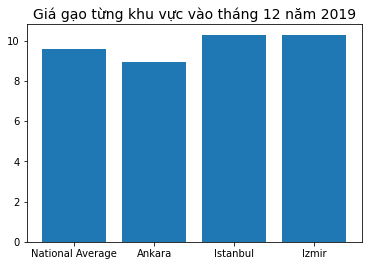

In [36]:
plt.bar(x = data['Place'], height = data['Price'])
plt.title('Giá gạo từng khu vực vào tháng 12 năm 2019', fontsize = 14)
plt.show()

### 2. Vẽ biểu đồ đường phân tích xu hướng giá gạo (Rice-Retail) trung bình cả nước (National Average) trong năm 2019 tại Thổ Nhĩ Kì.

In [38]:
data2 = df[(df['Place'] == 'National Average') &(df['ProductName'] == 'Rice - Retail') &
          (df['Year'] == 2019)]
data2

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
54,National Average,52,Rice - Retail,5,KG,1,2019,8.4275
55,National Average,52,Rice - Retail,5,KG,2,2019,8.7656
56,National Average,52,Rice - Retail,5,KG,3,2019,8.8101
57,National Average,52,Rice - Retail,5,KG,4,2019,8.9266
58,National Average,52,Rice - Retail,5,KG,5,2019,9.1866
59,National Average,52,Rice - Retail,5,KG,6,2019,9.2781
60,National Average,52,Rice - Retail,5,KG,7,2019,9.4634
61,National Average,52,Rice - Retail,5,KG,8,2019,9.4681
62,National Average,52,Rice - Retail,5,KG,9,2019,9.5000
63,National Average,52,Rice - Retail,5,KG,10,2019,9.4346


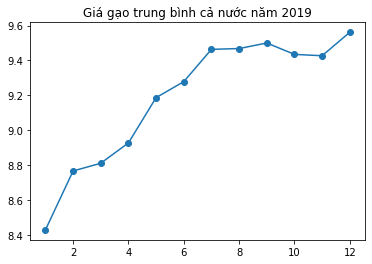

In [41]:
plt.plot(data2['Month'], data2['Price'], marker = 'o')
plt.title('Giá gạo trung bình cả nước năm 2019')
plt.show()

## 2. Phân tích dữ liệu daily-min-temperature

## 2.1 Tiền xử lý dữ liệu

In [72]:
df = pd.read_csv('Data/daily-min-temperatures.csv')
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [73]:
# Chuyển dữ liệu ngày tháng về datatime
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

####  ==> Không có dữ liệu thiếu

In [64]:
df.describe()

,Temp
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Phát hiện và xử lý outlier

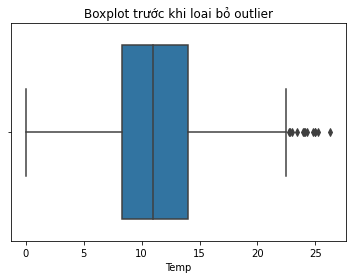

In [74]:
plt.title('Boxplot trước khi loai bỏ outlier')
sns.boxplot(x = df['Temp']);

In [76]:
Q1 = df['Temp'].quantile(q = 0.25)
Q3 = df['Temp'].quantile(q = 0.75)
IQR = Q3 - Q1

In [77]:
df = df[~((df['Temp'] < Q1 - 1.5*IQR) | (df['Temp'] > Q3 + 1.5*IQR))]

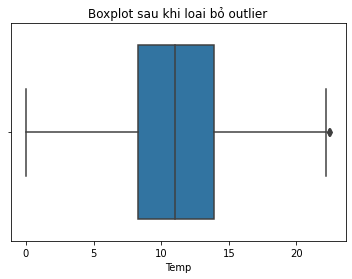

In [78]:
plt.title('Boxplot sau khi loai bỏ outlier')
sns.boxplot(x = df['Temp']);

In [80]:
df.describe()

,Temp
count,3637.000000
mean,11.131235
std,4.003457
min,0.000000
25%,8.300000
50%,11.000000
75%,13.900000
max,22.500000


####  ==> Dữ liệu đã tốt hơn

## 2.2 Visualization

### Chọn mục tiêu Vẽ biểu đồ Histogram phân tích các giá trị thống kê như max, min, mode, tần suất. Vẽ biểu đồ đường phân tích xu hướng thay đổi nhiệt độ theo thời gian.

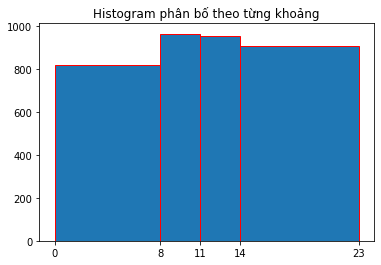

In [88]:
plt.hist(df['Temp'], bins = [0,8,11,14,23], edgecolor = 'red')
plt.xticks(ticks = [0,8,11,14,23]) 
plt.title('Histogram phân bố theo từng khoảng')
plt.show()

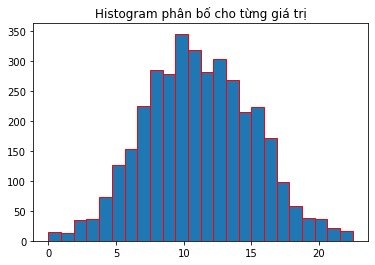

In [96]:
plt.hist(df['Temp'], bins = 24, edgecolor = 'red')
plt.title('Histogram phân bố cho từng giá trị')
plt.show()

### Nhận xét
- min = 0 
- max = 23
- mode = 11
- Nhiệt độ chủ yếu rơi vào khoảng 8- 11 độ
- Sau khi chuẩn hóa dữ liệu thì dữ liệu có thể thấy tuân theo PPC

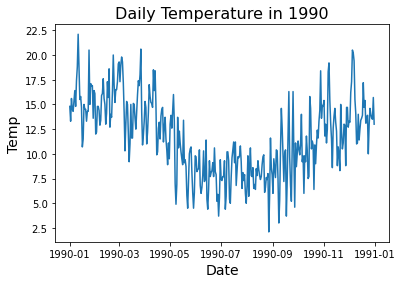

In [99]:
bounds = ['1/1/1990', '12/31/1990']
bounds = pd.to_datetime(bounds)
d1 = df[(df['Date'] >= bounds[0]) & (df['Date'] <= bounds[1])]
plt.plot(d1['Date'], d1['Temp'])
plt.title('Daily Temperature in 1990', fontsize = 16)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Temp', fontsize = 14)
plt.show()